In [269]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [270]:
data = pd.read_csv("../data/estudiantes_pregrado.csv")
data

,Carrera,201710,201720,201810,201820,201910,201920,202010,202020,202110,202120,202210
0,Administracion,985,989,989,1019,1020,1037,1058,1159,1202,1215,1246
1,Ingenieria Ambiental,416,380,376,357,348,304,267,245,216,187,170
2,Ingenieria Electrica,123,113,122,120,115,121,110,99,85,83,78
3,Diseno,761,751,761,765,781,793,795,812,833,828,826
4,Narrativas Digitales,0,0,0,0,7,34,70,112,136,160,196
5,Gobierno y asuntos publicos,177,212,233,252,274,272,286,273,276,262,228
6,Ingenieria de sistemas,546,570,607,627,676,657,709,696,722,731,787
7,Lenguas y cultura,132,154,164,164,178,165,157,140,169,165,161
8,Biologia,254,249,231,230,234,230,228,212,198,190,190
9,Microbiologia,162,172,181,168,172,182,185,174,191,178,167


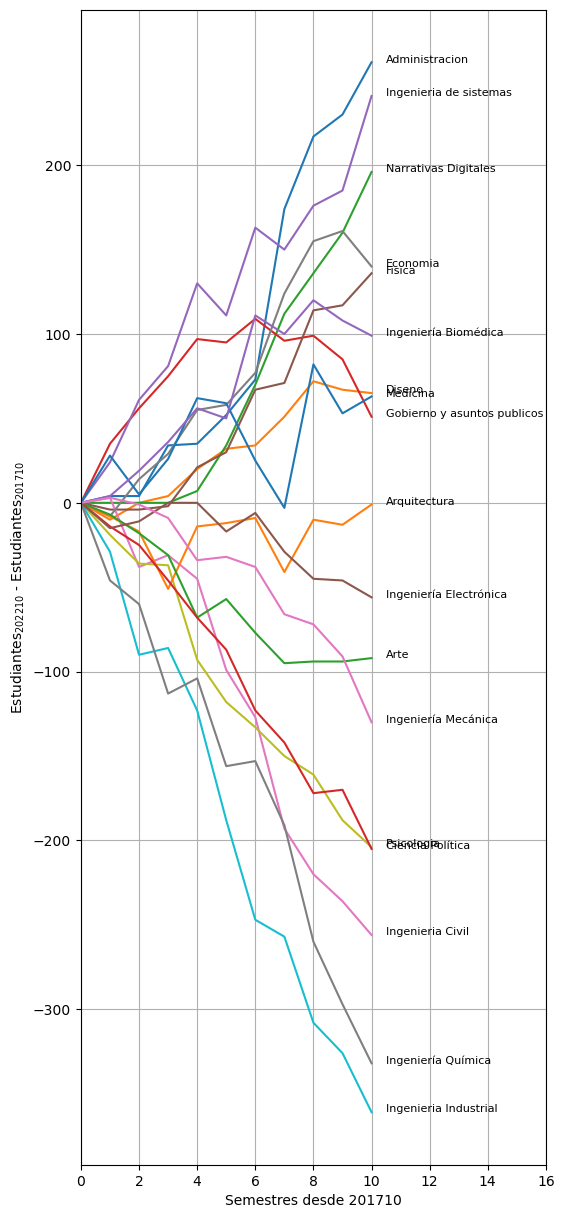

In [338]:
plt.figure(figsize=(6,15))

for i in range(len(data)):
    y = np.array(data.iloc[i][1:] - data.iloc[i][1])
    x = np.arange(len(y))
    if data.iloc[i][-1]>190:
        plt.plot(x,y)
    #print((data.iloc[i][-1] - data.iloc[i][1]), data.iloc[i][0])
        plt.text(10.5,(data.iloc[i][-1] - data.iloc[i][1]), data.iloc[i][0], fontsize=8)
plt.xlim(0,16)
plt.grid()
plt.xlabel("Semestres desde 201710")
plt.ylabel(r"Estudiantes$_{202210}$ - Estudiantes$_{201710}$")
plt.savefig("delta_estudiantes_tiempo.pdf", bbox_inches="tight")

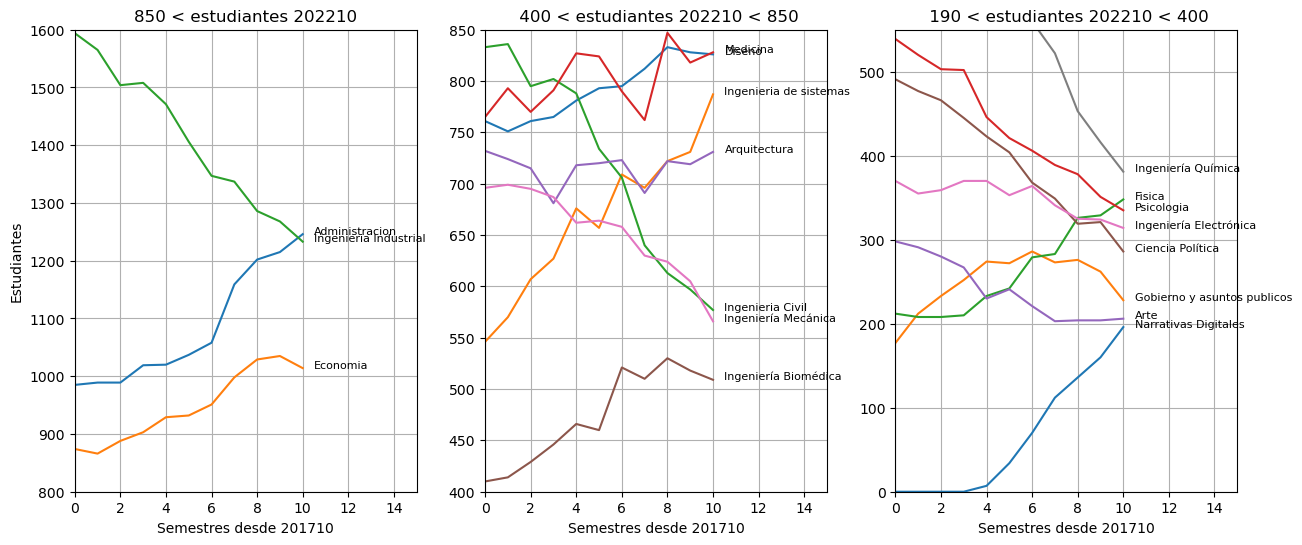

In [342]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
for i in range(len(data)):
    y = np.array(data.iloc[i][1:])
    x = np.arange(len(y))
    if (data.iloc[i][-1])>850:
        plt.plot(x,y)
        plt.text(10.5,(data.iloc[i][-1]), data.iloc[i][0], fontsize=8)
plt.xlim(0,15)
plt.ylim(800,1600)
plt.grid()
plt.ylabel("Estudiantes")
plt.xlabel("Semestres desde 201710")
plt.title("850 < estudiantes 202210")

plt.subplot(1,3,2)
for i in range(len(data)):
    y = np.array(data.iloc[i][1:])
    x = np.arange(len(y))
    if (data.iloc[i][-1])<850 and ((data.iloc[i][-1])>400):
        plt.plot(x,y)
        plt.text(10.5,(data.iloc[i][-1]), data.iloc[i][0], fontsize=8)
plt.xlim(0,15)
plt.ylim(400,850)
plt.grid()
plt.title(" 400 < estudiantes 202210 < 850")
plt.xlabel("Semestres desde 201710")

plt.subplot(1,3,3)
for i in range(len(data)):
    y = np.array(data.iloc[i][1:])
    x = np.arange(len(y))
    if (data.iloc[i][-1])<400 and ((data.iloc[i][-1])>190):
        plt.plot(x,y)
        plt.text(10.5,(data.iloc[i][-1]), data.iloc[i][0], fontsize=8)
plt.xlim(0,15)
plt.ylim(0,550)
plt.grid()
plt.title(" 190 < estudiantes 202210 < 400")
plt.xlabel("Semestres desde 201710")
plt.savefig("estudiantes_tiempo.pdf", bbox_inches="tight")

In [273]:
def find_a_v_from_data(x, y):
    a, b, c = np.polyfit(x, y, 2)
    max_t = len(x)-1
    v = 2*a*max_t + b
    #print(max_t)
    return a,v

def new_data_from_jackknife(x, y):
    n = len(x)
    ids = np.arange(n)
    new_ids = np.random.choice(ids, size=n)
    return x[new_ids], y[new_ids]

def estimate_a_v_with_uncertainty(x, y, N_iterations=100):
    a_values = np.zeros(N_iterations)
    v_values = np.zeros(N_iterations)
    for i in range(N_iterations):
        new_x, new_y = new_data_from_jackknife(x, y)
        a_values[i], v_values[i] = find_a_v_from_data(new_x, new_y)
    return a_values.mean(), v_values.mean()

In [281]:
n  = len(data)
acceleration = np.zeros(n)
velocity = np.zeros(n)
for i in range(n):
    y = np.array(np.float_(data.iloc[i][2:]))
    x = np.arange(len(y))*1.0
    acceleration[i], velocity[i] = estimate_a_v_with_uncertainty(x, y)

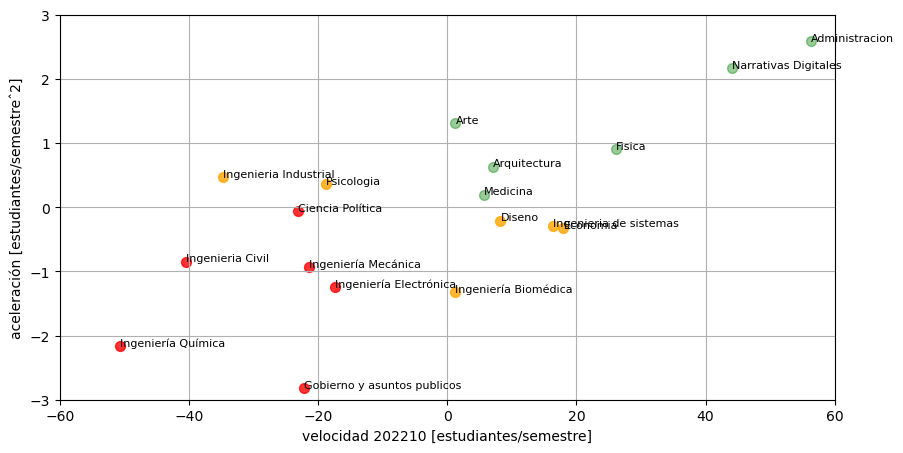

In [346]:
plt.figure(figsize=(10,5))
for i in range(n):
    #plt.plot(x,y)
    if data.iloc[i][-1]>190:
        if velocity[i]>0 and acceleration[i]>0:
            plt.scatter(velocity[i], acceleration[i], s=50, color='green', alpha=0.4)
        elif velocity[i]<0 and acceleration[i]<0:
            plt.scatter(velocity[i], acceleration[i], s=50, color='red', alpha=0.8)
        else:
            plt.scatter(velocity[i], acceleration[i], s=50, color='orange', alpha=0.8)
        plt.text(velocity[i], acceleration[i], data.iloc[i][0], fontsize=8)
plt.xlim(-60,60)
plt.ylim(-3,3)
plt.grid()
plt.xlabel("velocidad 202210 [estudiantes/semestre]")
plt.ylabel("aceleración [estudiantes/semestreˆ2]")
plt.savefig("velocidad_aceleracion.pdf", bbox_inches="tight")

In [253]:
velocity.min()

-49.76198305684914